In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import ConvE

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

print(sys.version)

In [4]:
print(time.asctime())

Thu Apr  4 14:59:18 2019


In [5]:
print(pykeen.get_version())

0.0.23


Check which hyper-parameters are required by ConvE:

In [6]:
ConvE.hyper_params

['embedding_dim',
 'ConvE_input_channels',
 'ConvE_output_channels',
 'ConvE_height',
 'ConvE_width',
 'ConvE_kernel_height',
 'ConvE_kernel_width',
 'conv_e_input_dropout',
 'conv_e_feature_map_dropout',
 'conv_e_output_dropout',
 'margin_loss',
 'learning_rate']

Define output directory:

In [7]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'pykeen_test'
)

Define hyper-parameters:

Note: ConvE_height * ConvE_width == embedding_dim

Note: ConvE_kernel_height <= ConvE_height

Note: ConvE_kernel_width <= ConvE_width

In [17]:
config = dict(
    training_set_path           = '../../data/rdf.nt',
    execution_mode              = 'Training_mode',
    random_seed                 = 0,
    kg_embedding_model_name     = 'ConvE',
    embedding_dim               = 50,
    ConvE_input_channels        = 1,  
    ConvE_output_channels       = 3,  
    ConvE_height                = 5,
    ConvE_width                 = 10,
    ConvE_kernel_height         = 5,
    ConvE_kernel_width          = 3,
    conv_e_input_dropout        = 0.2,
    conv_e_feature_map_dropout  = 0.5,
    conv_e_output_dropout       = 0.5,
    margin_loss                 = 1,
    learning_rate               = 0.01,
    num_epochs                  = 20,  
    batch_size                  = 64,
    preferred_device            = 'cpu'
)

Train ConvE:

In [18]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
INFO:pykeen.utilities.train_utils:****Run Model On CPU****
INFO:pykeen.utilities.train_utils:Training took 0 seconds 



Check result entries:

In [19]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Access trained model:

In [20]:
results.results['trained_model']

ConvE(
  (entity_embeddings): Embedding(89, 50)
  (relation_embeddings): Embedding(24, 50)
  (inp_drop): Dropout(p=0.2)
  (hidden_drop): Dropout(p=0.5)
  (feature_map_drop): Dropout2d(p=0.5)
  (loss): BCELoss()
  (conv1): Conv2d(1, 3, kernel_size=(5, 3), stride=(1, 1))
  (bn0): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc): Linear(in_features=144, out_features=50, bias=True)
)

Visualize loss values:

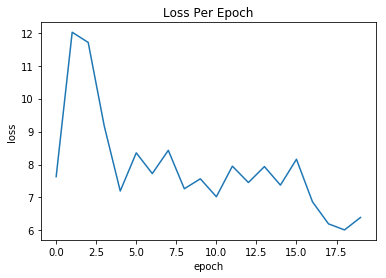

In [21]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()